# Analysis of the data

In [1]:
import datetime
import re

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../data/hope_mine_temperature_and_humidity.csv')

## Question 1: What are the columns

In [4]:
df.head()

,time,day,month,year,temp_open,temp_top,temp_5m,temp_10m,temp_20m,humidity_open,humidity_top,humidity_5m,humidity_10m,humidity_20m
0,14:30,15,7,2016,28.655,29.116,29.132,26.084,NaN,28.522,27.828,45.301,42.496,NaN
1,15:00,15,7,2016,24.656,24.117,24.633,24.584,NaN,27.145,25.121,27.816,26.514,NaN
2,15:30,15,7,2016,24.656,24.117,24.633,24.584,NaN,27.145,25.800,28.481,27.198,NaN
3,16:00,15,7,2016,24.656,24.117,25.133,25.084,NaN,27.145,27.828,27.148,27.880,NaN
4,16:30,15,7,2016,25.656,25.117,26.133,25.584,NaN,27.834,28.501,29.146,27.880,NaN


In [5]:
df.columns

Index(['time', 'day', 'month', 'year', 'temp_open', 'temp_top', 'temp_5m',
       'temp_10m', 'temp_20m', 'humidity_open', 'humidity_top', 'humidity_5m',
       'humidity_10m', 'humidity_20m'],
      dtype='object')

## Data: Question 1

We have columns for the time and dates.  Then we have columns for the temperature and columns for the humidity.

The data was collected at the unused Hope Mine in the Central Namib Desert, in Namibia.  It is basically a hole in the ground.  So we can see that the measurements for the temperature and humidity were taken outside the mine, at the opening, 5, 10 and 20 meters into the mine.

- time
- day
- month
- year
- temp_open
- temp_top
- temp_5m
- temp_10m
- temp_20m
- humidity_open
- humidity_top
- humidity_5m
- humidity_10m
- humidity_20m


## Question 2: Over what period of time?

In [6]:
df.shape

(19294, 14)

In [7]:
df.loc[0, ['day', 'month', 'year']]

day        15
month       7
year     2016
Name: 0, dtype: object

In [8]:
df.loc[df.shape[0]-1, ['day', 'month', 'year']]

day        21
month       8
year     2017
Name: 19293, dtype: object

## Data: Question 2

We have columns for the time and dates. Then we have columns for the temperature and columns for the humidity.

The data was collected at the unused Hope Mine in the Central Namib Desert, in Namibia. It is basically a hole in the ground. So we can see that the measurements for the temperature and humidity were taken outside the mine, at the opening, 5, 10 and 20 meters into the mine.

- time - Measurements were taken 2 times per hours, which were rounded to the top of the hour and half-past
- day, month, year - Range from 15 July 2016 to 21 August 2017
- temp_open
- temp_top
- temp_5m
- temp_10m
- temp_20m
- humidity_open
- humidity_top
- humidity_5m
- humidity_10m
- humidity_20m


## Question 3: How does time of day affect the data

### Temperature means based on the time of day

The below graph shows the average temperature through the main time points through the day, averaged over the year.

The temperatures are show for all five measurement points: outside, at the opening, 5 meters, 10 meters and 20 meters into the mine.

In [9]:
# 'temp_open', 'temp_top', 'temp_5m', 'temp_10m', 'temp_20m'

temp_outside_by_time = df.groupby(df['time'])['temp_open'].agg({lambda x: x.mean(skipna=False)})
temp_top_by_time = df.groupby(df['time'])['temp_top'].agg({lambda x: x.mean(skipna=False)})
temp_5m_by_time = df.groupby(df['time'])['temp_5m'].agg({lambda x: x.mean(skipna=True)})
temp_10m_by_time = df.groupby(df['time'])['temp_10m'].agg({lambda x: x.mean(skipna=False)})
temp_20m_by_time = df.groupby(df['time'])['temp_20m'].agg({lambda x: x.mean(skipna=True)})

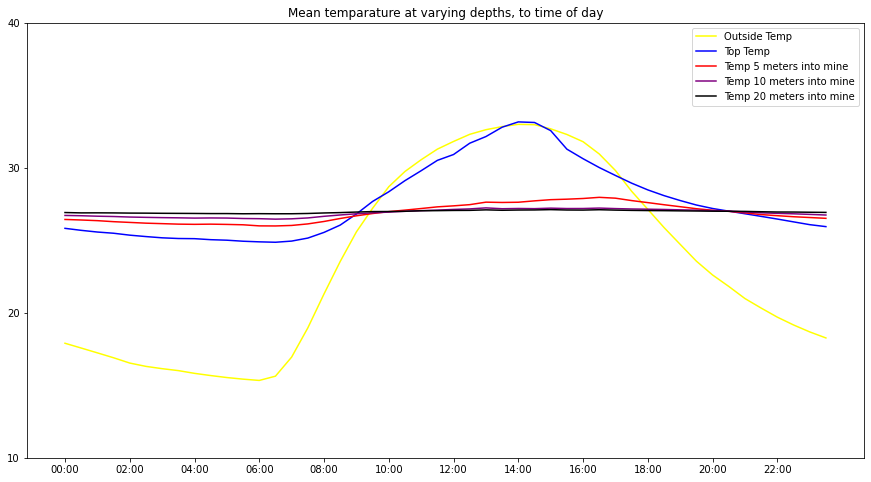

In [10]:
fig, ax = plt.subplots(figsize=(15, 8))
_ = ax.plot(temp_outside_by_time, color='yellow', label='Outside Temp')
_ = ax.plot(temp_top_by_time, color='blue', label='Top Temp')
_ = ax.plot(temp_5m_by_time, color='red', label='Temp 5 meters into mine')
_ = ax.plot(temp_10m_by_time, color='purple', label='Temp 10 meters into mine')
_ = ax.plot(temp_20m_by_time, color='black', label='Temp 20 meters into mine')
_ = ax.set_xticks([f'{str(h).zfill(2)}:00' for h in range(0, 24, 2)])
_ = ax.set_yticks([t for t in range(10, 50, 10)])
_ = ax.set_title("Mean temparature at varying depths, to time of day")
_ = ax.legend()

In [11]:
# Max average for outside
df.groupby(df['time'])['temp_open'].agg({lambda x: x.mean(skipna=False)}).agg(lambda z: round(z.min(), 0))

<lambda>    15.0
dtype: float64

In [12]:
# Mim average for outside
df.groupby(df['time'])['temp_open'].agg({lambda x: x.mean(skipna=False)}).agg(lambda z: round(z.max(), 0))

<lambda>    33.0
dtype: float64

In [13]:
# Mim average for top
df.groupby(df['time'])['temp_top'].agg({lambda x: x.mean(skipna=False)}).agg(lambda z: round(z.min(), 0))

<lambda>    25.0
dtype: float64

In [14]:
# Min average for 5 meters into the mine.
df.groupby(df['time'])['temp_5m'].agg({lambda x: x.mean(skipna=True)}).agg(lambda z: round(z.min(), 0))

<lambda>    26.0
dtype: float64

In [15]:
# Max average for 5 meters into the mine.
df.groupby(df['time'])['temp_5m'].agg({lambda x: x.mean(skipna=True)}).agg(lambda z: round(z.max(), 0))

<lambda>    28.0
dtype: float64

In [16]:
# Average average temparatures meters into the mine.
# This is really just the overall average
df.groupby(df['time'])['temp_5m'].agg({lambda x: x.mean(skipna=True)}).agg(lambda z: round(z.mean(), 0))

<lambda>    27.0
dtype: float64

### Humidity means based on the time of day

The below graph shows the average humidity through the main time points through the day, averaged over the year.

The humidity are show for all five measurement points: outside, at the opening, 5 meters, 10 meters and 20 meters into the mine.

In [17]:
# 'humidity_open', 'humidity_top', 'humidity_5m', 'humidity_10m', 'humidity_20m'

humidity_outside_by_time = df.groupby(df['time'])['humidity_open'].agg({lambda x: x.mean(skipna=False)})
humidity_top_by_time = df.groupby(df['time'])['humidity_top'].agg({lambda x: x.mean(skipna=False)})
humidity_5m_by_time = df.groupby(df['time'])['humidity_5m'].agg({lambda x: x.mean(skipna=True)})
humidity_10m_by_time = df.groupby(df['time'])['humidity_10m'].agg({lambda x: x.mean(skipna=False)})
humidity_20m_by_time = df.groupby(df['time'])['humidity_20m'].agg({lambda x: x.mean(skipna=True)})

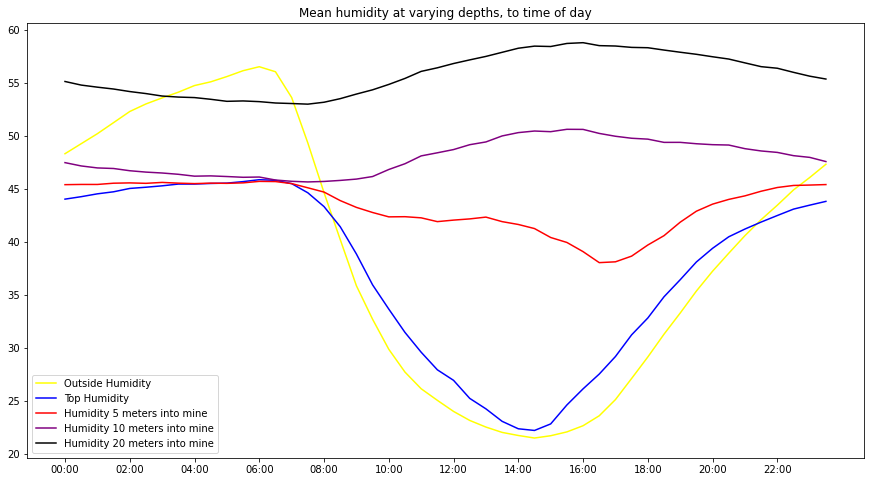

In [18]:
fig, ax = plt.subplots(figsize=(15, 8))
_ = ax.plot(humidity_outside_by_time, color='yellow', label='Outside Humidity')
_ = ax.plot(humidity_top_by_time, color='blue', label='Top Humidity')
_ = ax.plot(humidity_5m_by_time, color='red', label='Humidity 5 meters into mine')
_ = ax.plot(humidity_10m_by_time, color='purple', label='Humidity 10 meters into mine')
_ = ax.plot(humidity_20m_by_time, color='black', label='Humidity 20 meters into mine')
_ = ax.set_xticks([f'{str(h).zfill(2)}:00' for h in range(0, 24, 2)])
_ = ax.set_title("Mean humidity at varying depths, to time of day")
_ = ax.legend()

In [19]:
humidity_columns = ['humidity_open', 'humidity_top', 'humidity_5m', 'humidity_10m', 'humidity_20m']
df.loc[:, [*humidity_columns]].max()

humidity_open    106.867
humidity_top     101.385
humidity_5m      105.541
humidity_10m      85.186
humidity_20m      82.401
dtype: float64

In [20]:
df.loc[:, [*humidity_columns]].min()

humidity_open   -37.562
humidity_top      4.818
humidity_5m      12.118
humidity_10m     13.953
humidity_20m     17.706
dtype: float64

In [21]:
df.loc[df['humidity_open'] > 100]['humidity_open'].count()

254

In [22]:
df.loc[df['humidity_open'] < 0]['humidity_open'].count()

10

## Data: Question 3

We have columns for the time and dates. Then we have columns for the temperature and columns for the humidity.

The data was collected at the unused Hope Mine in the Central Namib Desert, in Namibia. It is basically a hole in the ground. So we can see that the measurements for the temperature and humidity were taken outside the mine, at the opening, 5, 10 and 20 meters into the mine.

### time

Measurements were taken 2 times per hours, which were rounded to the top of the hour and half-past

### day, month, year

Range from 15 July 2016 to 21 August 2017

### temp_open
 - By time of day: The average temperature dropped to a low, around 15°C, soon after six o'clock in the morning, and then rose sharply through the day.  It would peak just after 14:00 at around 33°C.

### temp_top
 - By time of day: At the top of the mine, temperatures rose roughly the same as the outside temperatures, but the minimums were significantly higher, at 25°C.

### temp_5m
 - By time of day: At a depth of 5 meters, there was very little change.  The low as at 26°C and the max was at 28°C.

### temp_10m
 - By time of day: At 10 meters down there was close to a 27°C daily average with very little difference throughout the day.

### temp_20m
 - By time of day: At a very similar temperature to 10 meters in, at 20 meters there was even less daily variation.

### humidity_open
 - By time of day: The data here is a little strange, as we seem to have a range from -37.562 to 106.867.  Since this is meant to be a percentage, we shouldn't be getting these values, and it calls into question the usefulness of the humidity data overall.  There were 254 recordings over 100, and 10 below zero, though the value at -37 was a big outlier.  That said, just looking at the trend, just in case it is meaningful, we see a clear trend where outide humidity rose high in the night to some time before morning, and then dropped steeply about two hours after midday.

### humidity_top
 - By time of day: Due to the questions about the data raised by the "humidity open" values, this one might also be questionable, but it also shows in interesting trend.  Here we see way less of a midday drop than the outside, but in general, it trends the same as the open humidity.

### humidity_5m
 - By time of day: Again, questionable data, but we see a similar, but muted trend to the data at the top of the mine and in the open.  The humidity at 5 meters varies the least through the day.

### humidity_10m
 - By time of day: Here, strangely, we see an opposite trend to what we see in the daytime.

### humidity_20m
 - By time of day: Like the humidity at 10 meters, it goes up in the daytime.  The humidity at this depth remains higher than the rest of the values, showing that the desert surface humidity has little influence down to this depth.

